In [2]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [3]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

In [4]:
import matplotlib.pyplot as plt

In [149]:
x = np.random.randint(-20, high=21, size=1000)
y = np.random.randint(-20, high=21, size=1000)
numb = 100
data1 = np.zeros((np.int(numb/2),2))
c = 0
for i in range(1000):
  if (x[i]**2 + y[i]**2)<10**2:
    if ~np.any(np.all(data1[:,:] == [x[i] , y[i]] , axis=1)):
      data1[c , 0] = x[i]
      data1[c , 1] = y[i]

      c += 1

  if c == numb/2:
    break

C = 0

data2 = np.zeros((np.int(numb/2),2))

for i in range(1000):
  if (x[i]**2 + y[i]**2)>10**2 and (x[i]**2 + y[i]**2)<20**2 :
    if ~np.any(np.all(data2[:,:] == [x[i] , y[i]] , axis=1)):
      data2[C , 0] = x[i]
      data2[C , 1] = y[i]

      C += 1

  if C == c:
    break
    

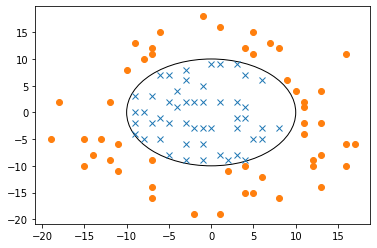

In [150]:
circle = plt.Circle((0,0),10,fill=False)
fig , ax = plt.subplots()
ax.plot(data1[:,0],data1[:,1],'x')
ax.plot(data2[:,0],data2[:,1],'o')
ax.add_artist(circle)
# plt.ylim(-10,10)
# plt.xlim(-10,10)

In [151]:
dataset = np.zeros((numb,2))
labels = np.zeros(numb,)
dataset[:int(numb/2),:]=data1
dataset[int(numb/2):,:]=data2
labels[:int(numb/2)] = 1
labels[int(numb/2):] = -1

In [152]:
index = np.arange(numb)
np.random.shuffle(index)

In [153]:
cc1 = np.int(0.8*numb)
cc2 = np.int(0.9*numb)
X_train = dataset[index[:cc1],:]
X_test  = dataset[index[cc1:cc2],:]
X_val   = dataset[index[cc2:],:]
Y_train = labels[index[:cc1]]
Y_test = labels[index[cc1:cc2]]
Y_val = labels[index[cc2:]]

In [154]:
linsvc = SVC(C=20 , kernel='linear')
model = linsvc.fit(X_train,Y_train)
print(model.score(X_train,Y_train))
print(model.score(X_test,Y_test))

0.6375
0.4


In [155]:
crange = np.arange(0.1,1,0.1)
train_accuracy = np.zeros(crange.shape[0])
val_accuracy = np.zeros(crange.shape[0])
i = 0
for c in crange: 
  svc = SVC(C=c , kernel='linear')
  model = svc.fit(X_train,Y_train)
  train_accuracy[i] = model.score(X_train,Y_train)
  val_accuracy[i] = model.score(X_val,Y_val)
  i+=1


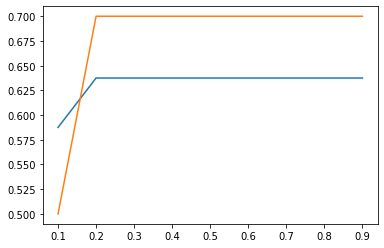

In [156]:
plt.plot(crange,train_accuracy)
plt.plot(crange,val_accuracy) 

In [157]:
bestC=crange[np.argmin(np.abs(train_accuracy-val_accuracy))]

In [158]:
svc = SVC(C=0.5,kernel='linear')
model = svc.fit(X_train,Y_train)
print('train accuracy = ' +str(model.score(X_train,Y_train)))
print('test accuracy = ' +str(model.score(X_test,Y_test)))

train accuracy = 0.6375
test accuracy = 0.4


In [159]:
svc = SVC(kernel='rbf')
model = svc.fit(X_train,Y_train)
print(model.score(X_train,Y_train))
print(model.score(X_val,Y_val))

0.975
1.0


In [160]:
svc = SVC(kernel='poly',degree=2)
model = svc.fit(X_train,Y_train)
print(model.score(X_train,Y_train))
print(model.score(X_val,Y_val))

0.9875
1.0


In [161]:
svc = SVC(kernel='poly',degree=3)
model = svc.fit(X_train,Y_train)
print(model.score(X_train,Y_train))
print(model.score(X_val,Y_val))

0.5625
0.2


In [162]:
svc = SVC(kernel='rbf',)
model = svc.fit(X_train,Y_train)
print(model.score(X_train,Y_train))
print(model.score(X_test,Y_test))

0.975
0.7


In [15]:
train_data = pd.read_csv('/content/adult_train.csv')
test_data = pd.read_csv('/content/Adult_test.csv')

In [16]:
col = train_data.columns

In [74]:
X_train = train_data[col[1:]]
Y_train = train_data[col[0]]
X_test = test_data[col[1:]]
Y_test = test_data[col[0]]

In [75]:
lb = LabelBinarizer()
onehot = OneHotEncoder()
X_train = onehot.fit_transform(X_train)
Y_train = lb.fit_transform(Y_train).reshape(Y_train.shape[0],)
X_test = onehot.fit_transform(X_test)
Y_test = lb.fit_transform(Y_test).reshape(Y_test.shape[0],)

In [77]:
linsvc = SVC(C=20 , kernel='linear')
model = linsvc.fit(X_train,Y_train)
print(model.score(X_train,Y_train))
print(model.score(X_test,Y_test))

0.8176
0.8109


In [78]:
print(model.support_vectors_.shape[0])

4152


In [79]:
index = np.arange(X_train.shape[0])
np.random.shuffle(index)
aa = np.int(0.95*X_train.shape[0])
X_val = X_train[index[aa:]]
Y_val = Y_train[index[aa:]]
X_train = X_train[index[:aa]]
Y_train = Y_train[index[:aa]]

In [80]:
crange = np.arange(0.1,1,0.1)

In [81]:
train_accuracy = np.zeros(crange.shape[0])
test_accuracy = np.zeros(crange.shape[0])
i = 0
for c in crange: 
  svc = SVC(C=c , kernel='linear')
  model = svc.fit(X_train,Y_train)
  train_accuracy[i] = model.score(X_train,Y_train)
  test_accuracy[i] = model.score(X_val,Y_val)
  i+=1


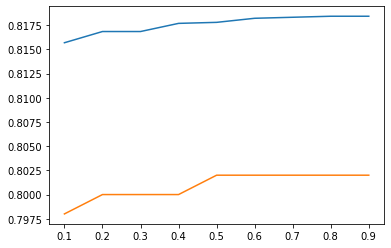

In [82]:
plt.plot(crange,train_accuracy)
plt.plot(crange,test_accuracy) 

In [83]:
bestC=crange[np.argmin(np.abs(train_accuracy-test_accuracy))]

In [84]:
svc = SVC(C=bestC,kernel='linear')
model = svc.fit(X_train,Y_train)
print('train accuracy = ' +str(model.score(X_train,Y_train)))
print('test accuracy = ' +str(model.score(X_test,Y_test)))

train accuracy = 0.8177894736842105
test accuracy = 0.8121


In [85]:
print(model.support_vectors_.shape[0])

3838


In [58]:
svc = SVC(kernel='rbf')
model = svc.fit(X_train,Y_train)
print('train accuracy = ' +str(model.score(X_train,Y_train)))
print('validatio accuracy = ' +str(model.score(X_val,Y_val)))

train accuracy = 0.8362105263157895
validatio accuracy = 0.83


In [59]:
svc = SVC(kernel='poly')
model = svc.fit(X_train,Y_train)
print('train accuracy = ' +str(model.score(X_train,Y_train)))
print('validatio accuracy = ' +str(model.score(X_val,Y_val)))

train accuracy = 0.8413684210526315
validatio accuracy = 0.826


In [86]:
crange = np.arange(0.1,1,0.1)

In [87]:
train_accuracy = np.zeros(crange.shape[0])
test_accuracy = np.zeros(crange.shape[0])
i = 0
for c in crange: 
  svc = SVC(C=c , kernel='rbf')
  model = svc.fit(X_train,Y_train)
  # print('C = ' + str(1-epsilon))
  train_accuracy[i] = model.score(X_train,Y_train)
  test_accuracy[i] = model.score(X_val,Y_val)
  i+=1

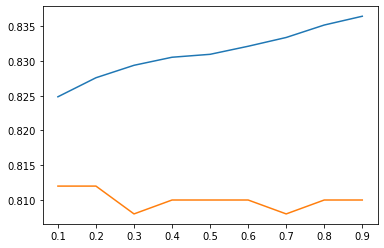

In [88]:
plt.plot(crange,train_accuracy)
plt.plot(crange,test_accuracy) 

In [89]:
bestC=crange[np.argmin(np.abs(train_accuracy-test_accuracy))]

In [90]:
svc = SVC(C=bestC,kernel='rbf')
model = svc.fit(X_train,Y_train)
print('train accuracy = ' +str(model.score(X_train,Y_train)))
print('test accuracy = ' +str(model.score(X_test,Y_test)))

train accuracy = 0.8248421052631579
test accuracy = 0.8207
